# MVP Análise de Dados e Boas Práticas

**Nome:** Maria Gabriela Ramos Neves

**Matrícula:** 4052024001914

**Dataset:** [Worldwide Travel Cities (Ratings and Climate)](https://www.kaggle.com/datasets/furkanima/worldwide-travel-cities-ratings-and-climate/data)


# Descrição do Problema

O conjunto de dados *Worldwide Travel Cities (Ratings and Climate)*, em tradução "Cidades de Viagens no Mundo (Avaliações e Clima)", contém informações relacionadas a viagens sobre 560 cidades ao redor do mundo oferecendo uma rica combinação de dados estruturados e avaliações subjetivas baseadas em experiências pessoais. Desta forma, suas aplicações variam desde sistemas de recomendação, até análise climática, clusterizações diversas, pesquisa turística, planejamento de viagens e outros.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Existe correlação entre cidades recomendadas com *Budget Level*  = *Luxury* e *Thematic Rating* alto em *Wellness*?

- Cidades com alto *Thematic Rating* em *Beaches* possuem temperaturas médias maiores (para os meses de julho e dezembro)?

- Existe correlação entre cidades recomendadas com *Budget Level* = *Luxury* e *Thematic Rating* alto em *Cuisine*?

## Tipo de Problema

Este é um problema multifacetado, que permite diversas abordagens de aprendizado de máquina. Entre as aplicações supervisionadas, podemos citar a classificação da duração ideal de estadia em uma cidade ou a estimativa do orçamento de uma viagem. Já entre as abordagens não supervisionadas, a clusterização das cidades em grupos similares seria uma alternativa interessante para identificar padrões.


Para simplificar e considerando a abordagem escolhida, este problema foi definido como uma tarefa de classificação do nível de orçamento (Budget Level) de uma viagem para uma cidade, com base nas características disponíveis no dataset. Dessa forma, trata-se de um problema de **aprendizado supervisionado**, onde o objetivo é prever uma variável categórica com base em dados rotulados.

## Seleção de Dados

O dataset foi escolhido dentre os disponíveis na plataforma kaggle. A principal característica levada em consideração foi a boa usabilidade, além disso o tema de fácil entendimento (já que viagens são parte do cotidiano da maior parte das pessoas) e a grande variedade de informações que levaria, potencialmente, a visualizações de dados interessantes para o estudo.

## Classes do Dataset

O dataset Iris contém 560 amostras, divididos da seguinte forma:

- 145 com nível de orçamento **Econômico** (*budget_level = Budget*)
- 339 com nível de orçamento **Médio** (*budget_level = Mid-range*)
- 76 com nível de orçamento **Luxuoso** (*budget_level = Luxury*)


## Atributos do Dataset

Além disso, o dataset possui os seguintes atributos:
- **id:** um identificador único para cada cidade.
- **city:** o nome da cidade de destino.
- **country:** o nome do país onde se localiza a cidade.
- **region:** o nome do continente ou região global onde o país de localiza.
- **short_description:** um breve resumo da atmosfera da cidade e das principais atrações.
- **latitude:** a latitude geográfica da cidade.
- **longitude:** a longitude geográfica da cidade.
- **avg_temp_monthly:** um objeto json contendo a média história, a máxima e mínima temperatura para cada mês do ano.
- **ideal_durations:** uma lista com as durações de viagem recomendadas adequadas ao destino.
- **budget_level:** a classe a ser predita no problema. O orçamento geral estimado para uma viagem, categorizado como "Econômico" (Budget), "Médio" (Mid-range) ou "Luxuoso" (Luxury).
- **culture:** um número de 1 a 5 que indica a riqueza de experiências culturais e locais históricos.
- **adventure:** um número de 1 a 5 que indica a disponibilidade de atividades de aventura e ao ar livre.
- **nature:** um número de 1 a 5 que indica a qualidade de paisagens naturais, parques e vida selvagem.
- **beaches:** um número de 1 a 5 que indica a qualidade e acessibilidade das praias próximas.
- **nightlife:** um número de 1 a 5 que indica a disponibilidade de festas, bares e vida noturna em geral.
- **cuisine:** um número de 1 a 5 que indica a qualidade e variedade da comida local e do cenário gastronômico.
- **wellness:** um número de 1 a 5 que indica a disponibilidade de atividades focadas no bem-estar, como spas, ioga e retiros.
- **urban:** um número de 1 a 5 que indica a qualidade do ambiente urbano, incluindo arquitetura, acessibilidade a pé.
- **seclusion:** um número de 1 a 5 que indica a disponibilidade de locais tranquilos e oportunidades para fugir das multidões.

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Download, descompresão e leitura do dataset

In [2]:
# Download do dataset
!curl -L -o travel-cities.zip https://www.kaggle.com/api/v1/datasets/download/furkanima/worldwide-travel-cities-ratings-and-climate

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  114k  100  114k    0     0   313k      0 --:--:-- --:--:-- --:--:--  313k


In [3]:
# Unzip da base
!unzip -q ./travel-cities.zip -d ./cities_data

replace ./cities_data/Worldwide Travel Cities Dataset (Ratings and Climate).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [4]:
df = pd.read_csv('/content/cities_data/Worldwide Travel Cities Dataset (Ratings and Climate).csv')

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA), buscamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset possui 560 instâncias (observações) e 19 colunas com diferentes informações, conforme explorado anteriormente. Nelas, existem dados categóricos (do tipo objeto) e numéricos (dos tipos float e inteiro), sendo que o atributo a ser predito, "budget_level", é categórico (do tipo objeto).

In [5]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 560

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 560 non-null    object 
 1   city               560 non-null    object 
 2   country            560 non-null    object 
 3   region             560 non-null    object 
 4   short_description  560 non-null    object 
 5   latitude           560 non-null    float64
 6   longitude          560 non-null    float64
 7   avg_temp_monthly   560 non-null    object 
 8   ideal_durations    560 non-null    object 
 9   budget_level       560 non-null    object 
 10  culture            560 non-null    int64  
 11  adventure          560 non-null    int64  
 12  nature             560 non-null    int64  
 13  beaches            560 non-null    int64  
 14  nightlife          560 non-null    int64  
 15  cuisine            56

## Primeiras linhas do dataset

In [6]:
# Observando as primeiras linhas do dataset
df.head()

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2


Ao observar as primeiras linhas do dataset em conjunto com os tipos de dados vistos na seção anterior, o que mais chama a atenção é a diversidade de tipos de dados que está presente nele, incluindo listas, json, textos, floats, inteiros e palavras.

In [7]:
df.groupby('budget_level')['id'].count()

,id
budget_level,
Budget,145
Luxury,76
Mid-range,339


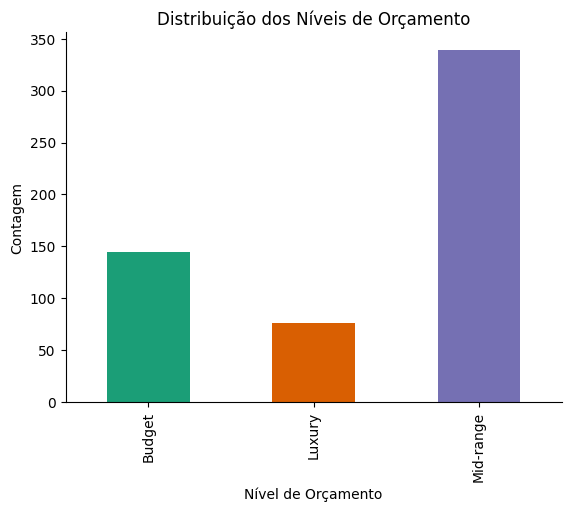

In [8]:
# distribuição das classes

df.groupby('budget_level').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Distribuição dos Níveis de Orçamento')
plt.xlabel('Nível de Orçamento')
plt.ylabel('Contagem')
plt.show()

O gráfico de barras mostra que cada classe aparece com uma frequência diferente no dataset, demonstrando desbalanceamento que pode necessitar de tratamento futuro. A maior e a menor classe tem 263 amostras de diferença, o que é considerável.

### Tratamento da coluna `avg_temp_monthly` para análises

A coluna *avg_temp_monthly* é composta por um json que possui as temperaturas média, mínima e máxima para cada mês do ano em cada cidade do dataset. Sendo assim, esta é uma coluna complexa de se analisar e entender.

Para melhor conduzir nosso estudo, criarei a coluna *avg_temp_july* com a temperatura média para julho, último mês do primeiro semestre e com alto índice de viagens para as pessoas do hemisfério norte e a coluna *avg_temp_dec* com a temperatura média para dezembro, último mês do segundo semestre e com alto número de viagens para as pessoas do hemisfério sul.

In [9]:
df["avg_temp_july"] = df["avg_temp_monthly"].apply(lambda x: json.loads(x)["7"]["avg"])
df["avg_temp_dec"] = df["avg_temp_monthly"].apply(lambda x: json.loads(x)["12"]["avg"])

In [10]:
df.head()

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,...,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,avg_temp_july,avg_temp_dec
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,...,2,2,1,4,5,3,5,2,25.8,4.7
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,...,4,5,5,2,3,4,1,5,26.1,28.2
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,...,5,5,2,3,3,4,2,4,18.2,-1.8
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,...,3,3,1,3,4,3,4,2,20.7,14.9
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,...,3,3,2,3,4,3,4,2,28.2,28.7


## Checagem de valores faltantes, discrepantes ou inconsistentes

In [11]:
# Busca por valores faltantes em todas as colunas do dataset
df.isnull().sum()

,0
id,0
city,0
country,0
region,0
short_description,0
latitude,0
longitude,0
avg_temp_monthly,0
ideal_durations,0
budget_level,0


Não há valores nulos (faltantes) em nenhuma coluna do conjunto de dados.

In [12]:
# Busca por valores discrepantes ou inconsistentes em colunas numéricas
df.describe()

,latitude,longitude,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,avg_temp_july,avg_temp_dec
count,560.000000,560.000000,560.00000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,22.502186,7.914665,3.85000,3.178571,3.728571,2.380357,3.019643,3.792857,3.073214,3.146429,3.028571,22.801607,13.665000
std,27.980022,78.813803,0.81291,0.798190,0.903920,1.435547,0.921599,0.679329,0.592134,1.018604,0.989699,6.339866,10.248338
min,-54.807306,-175.201808,2.00000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,-3.500000,-20.900000
25%,5.268054,-64.439118,3.00000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000,18.875000,5.200000
50%,31.793618,10.711854,4.00000,3.000000,4.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,23.900000,13.450000
75%,43.673199,50.020162,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,27.500000,23.625000
max,78.719852,179.332896,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,40.200000,29.800000


Os valores de latitude podem variar em um intervalo de -90 a +90 graus entre o polo norte e o polo sul. Assim, como o mínimo do dataset é -54,81 graus e o máximo é 78,72 graus, os valores estão consistentes.

Já para longitude, os valores variam entre -180 e 180 graus do extremo oeste ao extremo leste. No conjunto de dados, os valores de longitude variam entre -175,20 graus e 179,33 graus, ou seja, estão dentro do esperado e são consistentes.

Para as colunas de temperatura (avg_temp_july e avg_temp_dec), o mínimo apresentado é de -3,5°C e -20,9°C e o máximo de 40,2°C e 29,8°C. Considerando que a temperaturas mais baixa registrada na Terra foi -89,2°C (Estação Vostok, Antártica) e que as temperatiras típicas em regiões extremamente frias ficam por volta de -50°C. Considerando ainda que a temperatura mais alta já registrada foi 56,7°C (Vale da Morte, Califórnia) e que a temperatura típica de regiões extremamente quentes é por volta de 45°C, as temperaturas apresentadas no dataset (mínima, média e máxima) estão consistentes.

Para as demais colunas numéricas — culture, adventure, nature, beaches, nightlife, cuisine, wellness, urban e seclusion — os valores variam dentro do intervalo de 1 a 5, representando as avaliações em cada categoria. Os dados dessas colunas também se mostram coerentes e consistentes, conforme evidenciado na tabela.

In [13]:
# Busca por valores discrepantes ou inconsistentes em colunas categóricas
df['budget_level'].unique()

array(['Luxury', 'Mid-range', 'Budget'], dtype=object)

In [14]:
df['ideal_durations'].unique()

array(['["Short trip","One week"]', '["Long trip","One week"]',
       '["Short trip","Weekend","One week"]',
       '["Weekend","One week","Short trip"]', '["Short trip","Weekend"]',
       '["Short trip","Weekend","Day trip"]', '["Weekend","Short trip"]',
       '["One week","Short trip"]',
       '["Long trip","One week","Short trip"]',
       '["Short trip","One week","Weekend"]',
       '["One week","Short trip","Weekend"]',
       '["Day trip","Weekend","Short trip"]',
       '["Short trip","One week","Long trip"]',
       '["Weekend","Short trip","Day trip"]', '["Day trip","Weekend"]',
       '["Weekend","Day trip"]', '["One week","Long trip"]',
       '["Long trip","Short trip","One week"]',
       '["Short trip","Long trip","One week"]',
       '["Weekend","Day trip","Short trip"]',
       '["One week","Weekend","Short trip"]'], dtype=object)

In [15]:
df['region'].unique()

array(['europe', 'oceania', 'north_america', 'asia', 'africa',
       'middle_east', 'south_america'], dtype=object)

In [16]:
df['country'].unique()

array(['Italy', 'Fiji', 'Canada', 'Mexico', 'Indonesia', 'Greenland',
       'Namibia', 'Jamaica', 'Greece', 'Georgia', 'Germany', 'Australia',
       'Japan', 'Netherlands', 'Myanmar', 'Sweden', 'United States',
       'Norway', 'Belgium', 'Iceland', 'South Korea', 'Turkey', 'Ireland',
       'Zambia', 'Poland', 'Jordan', 'Maldives', 'American Samoa',
       'Angola', 'Barbados', 'Spain', 'Benin', 'Bosnia and Herzegovina',
       'Albania', 'Brazil', 'Cambodia', 'Morocco', 'Mozambique',
       'Tanzania', 'Bermuda', 'Chile', 'China', 'Nepal', 'New Zealand',
       'Colombia', 'Cook Islands', 'North Macedonia', 'Croatia', 'Panama',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Peru', 'France',
       'Equatorial Guinea', 'Eswatini', 'Bulgaria', 'San Marino',
       'Finland', 'Sri Lanka', 'Senegal', 'Singapore', 'Slovenia',
       'Malta', 'Guyana', 'Vietnam', 'India', 'Hungary', 'Monaco',
       'Taiwan', 'New Caledonia', 'Kenya', 'Lesotho', 'Qatar',
       'Kazakhstan', 'Laos', '

Os dados categóricos analisados estão consistentes e corretos. A única observação possível diz respeito à forma como algumas regiões foram nomeadas ou agrupadas. Por exemplo, o dataset separa o continente americano em north_america e south_america, enquanto em algumas abordagens ele poderia ser tratado como uma única unidade. Além disso, há a inclusão de territórios e regiões não soberanas como se fossem países — como é o caso de Quebec, uma província do Canadá. No entanto, essas escolhas não configuram necessariamente uma inconsistência, mas sim uma questão de definição adotada na construção do dataset.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [17]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
latitude,22.502186
longitude,7.914665
culture,3.850000
adventure,3.178571
nature,3.728571
beaches,2.380357
nightlife,3.019643
cuisine,3.792857
wellness,3.073214
urban,3.146429


- Latitude (22,5)
  - A média da latitude (22,50) sugere que as cidades estão em regiões tropicais ou subtropicais (próximas ao Trópico de Câncer).
- Longitude (7,91)
  - A média de longitude (7,91) indica que as cidades estão concentradas no Hemisfério Oriental, possivelmente na Europa, África ou Ásia.

- avg_temp_july (22,80°C):
  - A temperatura média em julho é agradável, típica de regiões com verões moderados.
- avg_temp_dec (13,66°C):
  - A temperatura média em dezembro é mais baixa, indicando que as cidades estão em regiões com invernos suaves.

- Culture (3,85), Cuisine (3,79) e Nature (3,73):
  - Apresentam médias mais altas, indicando que, nas cidades avaliadas, predominam altas notas nesses indicadores, sugerindo que essas características são mais presentes.

- Adventure (3,18), Nightlife (3,01), Wellness (3,07), Urban (3,14) e Seclusion (3,02):
  - Apresentam médias equilibradas, próximas ao valor central do intervalo possível. Sugerindo que o conjunto de dados apresenta cidades com valores equilibrados nesses indicadores ou que eles se concentram no valor central do intervalo. Para uma análise mais precisa, seria importante avaliar o desvio padrão para entender a dispersão dos dados.

- Beaches (2,38):
  - As praias têm a menor média dentro os indicadores, sugerindo que a maioria das cidades do *dataset* não é conhecida pela qualidade e acessibilidade das praias próximas.

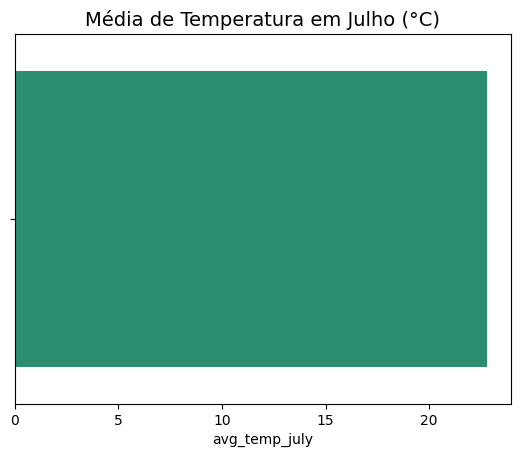

In [18]:
sns.barplot(
    data=df,
    x='avg_temp_july',
    estimator='mean',
    errorbar=None,
    color=sns.color_palette('Dark2')[0]
)
plt.title('Média de Temperatura em Julho (°C)', fontsize=14)


plt.show()

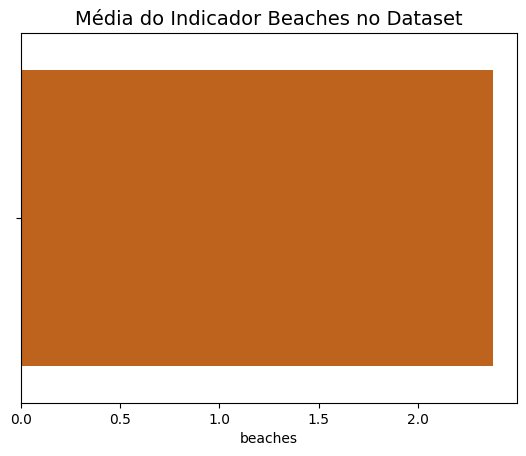

In [19]:
sns.barplot(
    data=df,
    x='beaches',
    estimator='mean',
    errorbar=None,
    color=sns.color_palette('Dark2')[1]
)
plt.title('Média do Indicador Beaches no Dataset', fontsize=14)
plt.show()

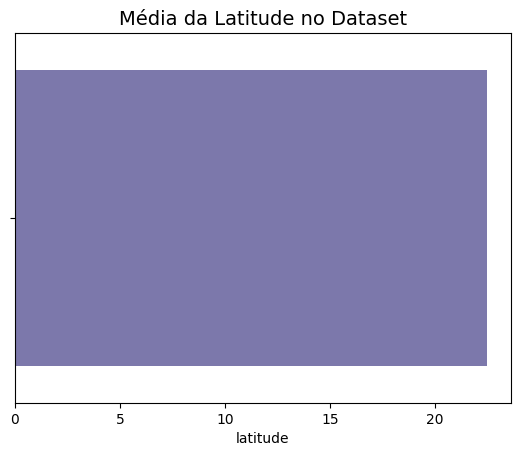

In [20]:
sns.barplot(
    data=df,
    x='latitude',
    estimator='mean',
    errorbar=None,
    color=sns.color_palette('Dark2')[2]
)
plt.title('Média da Latitude no Dataset', fontsize=14)
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [21]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
latitude,27.980022
longitude,78.813803
culture,0.812910
adventure,0.798190
nature,0.903920
beaches,1.435547
nightlife,0.921599
cuisine,0.679329
wellness,0.592134
urban,1.018604


- Latitude (27,98) e Longitude (78,81):
  - Os altos desvios padrão indicam que as cidades estão distribuídas em uma ampla faixa geográfica, abrangendo diferentes regiões do mundo.

- Culture (0,81) e Cuisine (0,67):
  - Apresentam médias altas (Culture = 3,85) (Cuisine = 3,79) e desvios padrão relativamente baixos, indicando que essas características são consistentemente presentes nas cidades avaliadas, com pouca variação entre elas (apresentam notas altas nos indicadores na maior parte do conjunto de dados).

- Adventure (0,79), Nightlife (0,92) e Nature (0,90):
  - Apresentam médias moderadas (Adventure = 3,18), (Nightlife = 3,01) e (Nature = 3,73) e desvios padrão também moderados, sugerindo que algumas cidades se destacam mais nesses aspectos, enquanto outras menos.

- Beaches (1,43):
  - Apresenta o maior desvio padrão entre os indicadores de viagem, combinado com a média mais baixa (Beaches = 2,38), sugerindo que há grande disparidade: algumas cidades têm muita qualidade e acessibilidade de praias próximas, enquanto outras não possuem essa característica.

- Wellness (0,59):
  - O menor desvio padrão entre os indicadores de viagem, combinado com uma média moderada (Wellness = 3,07), sugere que o "bem-estar" é uniformemente presente nas cidades, sem grandes diferenças.

- Urban (1,01) e Seclusion (0,98):
  - Os desvios padrão mostram que há variação considerável entre cidades urbanas e isoladas, indicando que algumas cidades são muito metropolitanas, enquanto outras oferecem mais tranquilidade.

- avg_temp_july (6,34):
  - Apesar da média amena (22,80 °C), o desvio padrão indica variação significativa entre as cidades, com algumas sendo mais quentes e outras mais frias em julho.

- avg_temp_dec (10,25):
  - O alto desvio padrão combinado com a média (13,66 °C) sugere que as temperaturas em dezembro variam amplamente, com cidades em climas mais frios e outras em climas mais quentes.


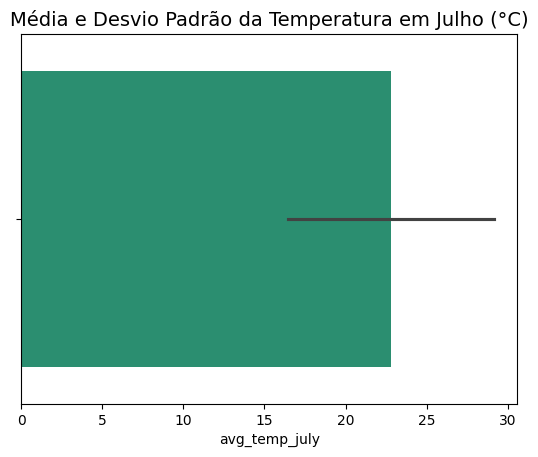

In [22]:
sns.barplot(
    data=df,
    x='avg_temp_july',
    errorbar='sd',
    color=sns.color_palette('Dark2')[0]
)
plt.title('Média e Desvio Padrão da Temperatura em Julho (°C)', fontsize=14)

plt.show()

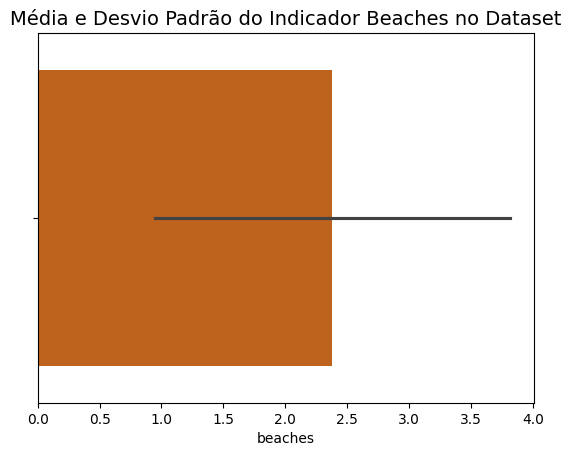

In [23]:
sns.barplot(
    data=df,
    x='beaches',
    errorbar='sd',
    color=sns.color_palette('Dark2')[1]
)
plt.title('Média e Desvio Padrão do Indicador Beaches no Dataset', fontsize=14)

plt.show()

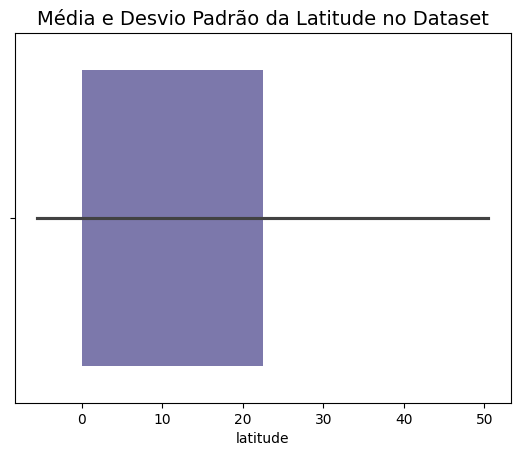

In [24]:
sns.barplot(
    data=df,
    x='latitude',
    errorbar='sd',
    color=sns.color_palette('Dark2')[2]
)
plt.title('Média e Desvio Padrão da Latitude no Dataset', fontsize=14)

plt.show()

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

Como o dataset tem 19 colunas, selecionei algumas delas, com base nas medidas de dispersão já analisadas, para entendermos em mais detalhes a distribuição.

### Temperatura Média (Julho)


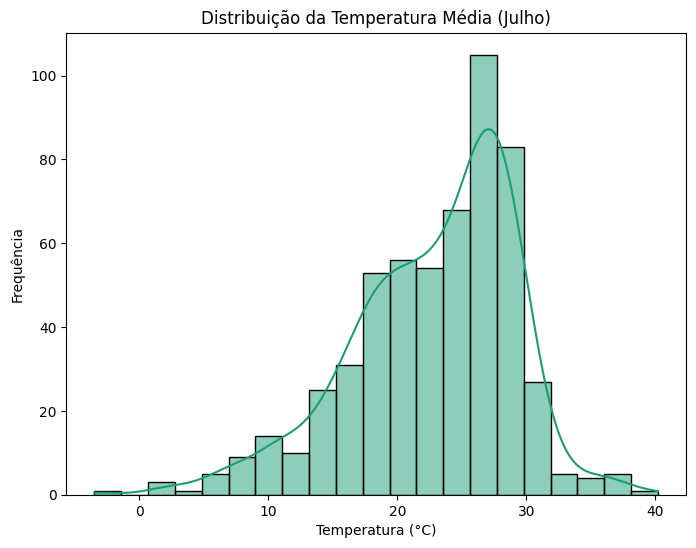

In [25]:
plt.figure(figsize=(8, 6))

sns.histplot(df['avg_temp_july'], kde=True, color=sns.color_palette('Dark2')[0])
plt.title('Distribuição da Temperatura Média (Julho)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição das temperaturas médias em julho para as cidades do dataset, com a maioria concentrada entre 20°C e 30°C, indicando que essas cidades estão em regiões com temperaturas agradáveis e quentes. O pico de frequência ocorre entre 25°C e 30°C, enquanto temperaturas muito baixas, abaixo de 10°C, e muito altas, acima de 30°C, são menos comuns. A curva de densidade sobreposta reforça essa tendência, destacando que a maior parte das cidades apresenta temperaturas moderadas e quentes durante o mês de julho.

### Temperatura Média (Dezembro)

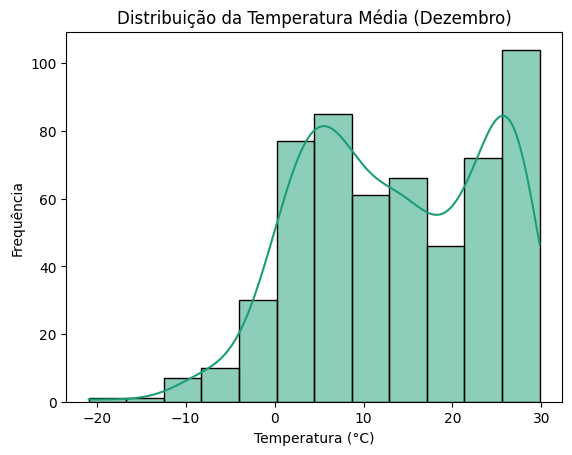

In [26]:
sns.histplot(df['avg_temp_dec'], kde=True, color=sns.color_palette('Dark2')[0])
plt.title('Distribuição da Temperatura Média (Dezembro)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.show()

Já o histograma da temperatura média em dezembro apresenta uma distribuição mais ampla, com cidades apresentando temperaturas que variam de valores negativos, abaixo de -10°C, até máximas próximas de 30°C. A maior concentração de cidades está entre 0°C e 10°C, indicando que muitas delas estão em regiões com frias, mas não extremas. Há também um segundo pico em torno de 30°C, sugerindo a presença de cidades em regiões tropicais ou do hemisfério sul, onde dezembro corresponde ao verão. A curva de densidade destaca essa dualidade climática, refletindo a diversidade de condições entre cidades de diferentes latitudes e hemisférios.

### Longitude

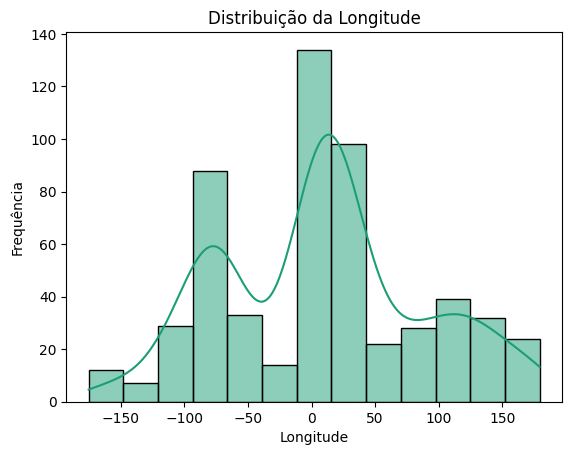

In [27]:
sns.histplot(df['longitude'], kde=True, color=sns.color_palette('Dark2')[0])
plt.title('Distribuição da Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequência')
plt.show()

O histograma da distribuição de longitude mostra que a maioria das cidades está concentrada em torno de valores próximos a 0°, indicando uma predominância de cidades localizadas próximas ao meridiano de Greenwich, que atravessa a Europa e a África. Há também uma significativa concentração de cidades com longitudes negativas, entre -50° e -100°, representando regiões nas Américas. Longitudes positivas, entre 50° e 100°, indicam cidades localizadas na Ásia e Oceania, embora em menor quantidade.

## Boxplot

Para entender as diferenças entre as classes, devemos olhar como se comportam os valores quando agrupadas por elas. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para cidades com budget_level = Budget, Mid-range e Luxury, além de visualizar suas distribuições por meio de boxplots.

In [28]:
# Estatísticas descritivas agrupadas por classe
df.groupby('budget_level').describe()

latitude                                                        \
                count       mean        std        min       25%        50%   
budget_level                                                                  
Budget          145.0  18.394529  22.001487 -49.331956  5.824176  19.758952   
Luxury           76.0  25.984331  30.064039 -45.032192 -0.649750  34.852666   
Mid-range       339.0  23.478491  29.615170 -54.807306  6.123869  36.139625   

                                   longitude             ... avg_temp_july  \
                    75%        max     count       mean  ...           75%   
budget_level                                             ...                 
Budget        36.800207  58.380121     145.0  29.121098  ...         28.80   
Luxury        47.054968  78.719852      76.0   5.563991  ...         26.45   
Mid-range     45.373838  68.970665     339.0  -0.628939  ...         27.00   

                   avg_temp_dec                                           \
               max        count       mean        std   min   25%    50%   
budget_level                                                               
Budget        35.8        145.0  16.554483  10.031617 -20.9  8.70  17.90   
Luxury        40.2         76.0  12.371053  11.691351  -9.1  2.95   8.95   
Mid-range     36.4        339.0  12.719174   9.779671 -14.6  5.45  11.80   

                           
                75%   max  
budget_level               
Budget        25.90  29.3  
Luxury        24.25  29.8  
Mid-range     21.50  29.5  

[3 rows x 104 columns]

### Indicador *wellness* por Classe


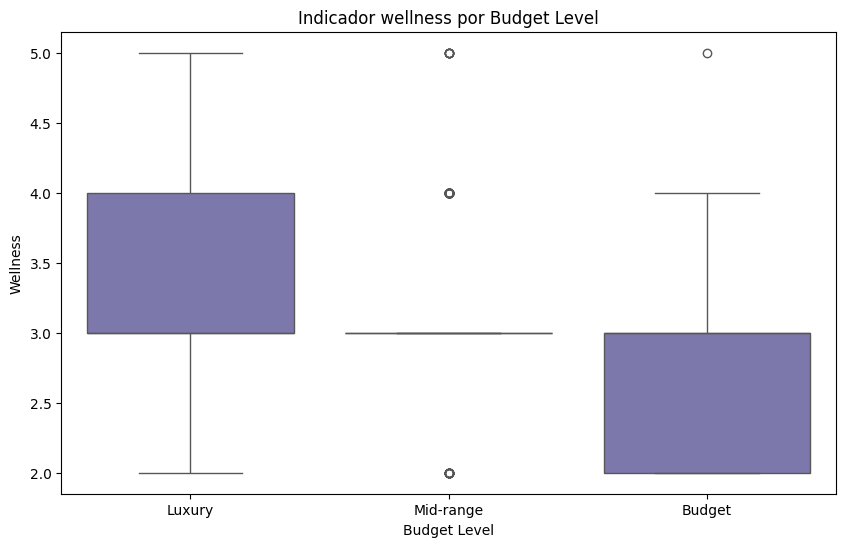

In [29]:
# Boxplot do indicador wellness por budget level
plt.figure(figsize=(10, 6))
sns.boxplot(x='budget_level', y='wellness', data=df, color=sns.color_palette('Dark2')[2])
plt.title('Indicador wellness por Budget Level')
plt.xlabel('Budget Level')
plt.ylabel('Wellness')
plt.show()

É um indicador que dispersa bem as três classes de *Budget Level*

- Luxury:
	- Apresenta as maiores avaliações em Wellness, com menor dispersão e maior consistência.
- Mid-range:
	- Mostra pouca variabilidade, com avaliações bastante concentradas em torno de 3.0, sem destaque em Wellness.
- Budget:
	- Tem maior dispersão, com avaliações que variam de moderadas a boas, mas com mediana mais baixa que Luxury.

### Indicador *cuisine* por Classe

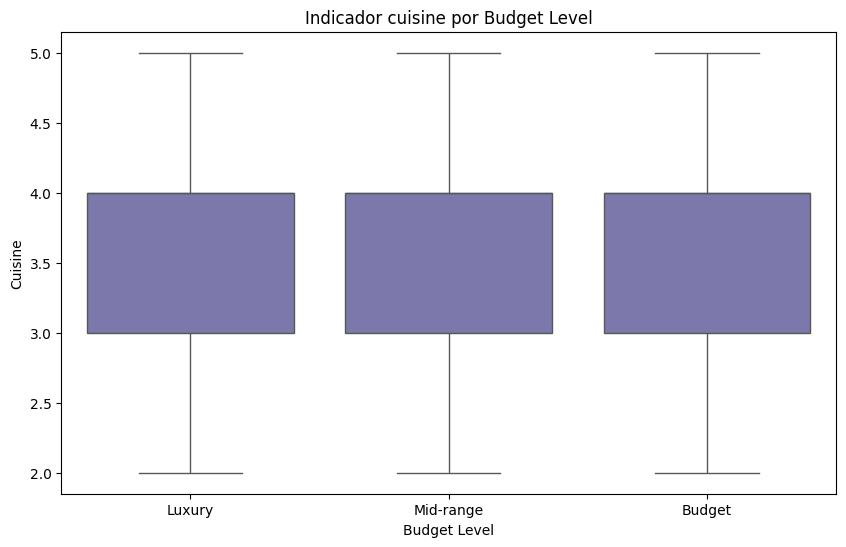

In [30]:
# Boxplot do indicador cuisine por budget level
plt.figure(figsize=(10, 6))
sns.boxplot(x='budget_level', y='cuisine', data=df, color=sns.color_palette('Dark2')[2])
plt.title('Indicador cuisine por Budget Level')
plt.xlabel('Budget Level')
plt.ylabel('Cuisine')
plt.show()


A mediana para todas as classes está em torno de 4, indicando que a avaliação deste indicador é consistentemente alta, independentemente do nível de orçamento.

- Luxury:

	- Apresenta uma distribuição muito semelhante às outras categorias, com mediana em 4,0 e valores concentrados entre 3,5 e 4,5.
	- Não há evidência de que cidades de luxo tenham avaliações significativamente melhores em gastronomia.

- Mid-range:
	- A distribuição é praticamente idêntica à de Luxury, com mediana em 4,0 e valores variando de 2,0 a 5,0.
	- Cidades de nível médio também apresentam avaliações consistentes em gastronomia.

- Budget:
	- A mediana e o intervalo interquartil são iguais aos das outras categorias, indicando que cidades econômicas também oferecem boa qualidade e variedade da comida local e do cenário gastronômico.

### Indicador *beaches* por Classe

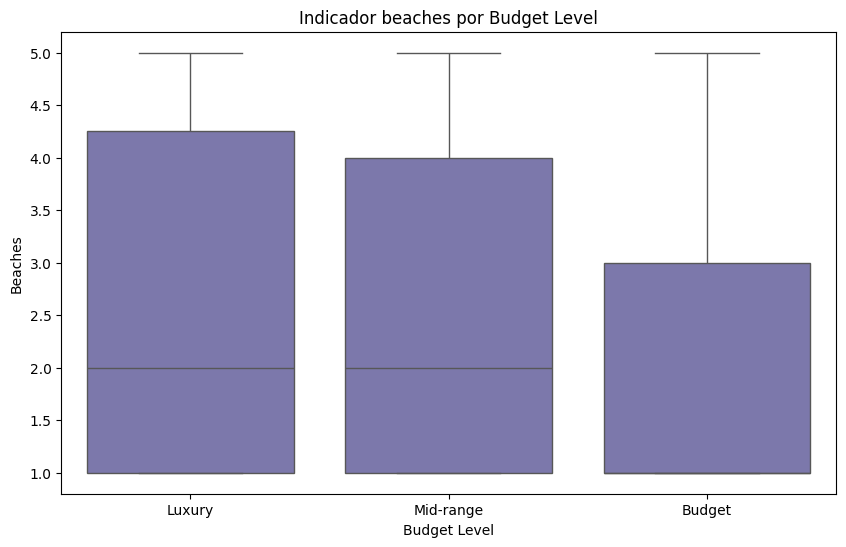

In [31]:
# Boxplot do indicador beaches por budget level
plt.figure(figsize=(10, 6))
sns.boxplot(x='budget_level', y='beaches', data=df, color=sns.color_palette('Dark2')[2])
plt.title('Indicador beaches por Budget Level')
plt.xlabel('Budget Level')
plt.ylabel('Beaches')
plt.show()

- Luxury e Mid-range:
	- Ambas as categorias apresentam distribuições muito semelhantes, com medianas em 2,0 e ampla variação no indicador de praias.

- Budget:
	- Cidades econômicas têm avaliações mais baixas em Beaches, com mediana em 1,5 e menor variação, indicando que praias de alta qualidade são menos comuns em destinos econômicos.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos do conjunto de dados podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

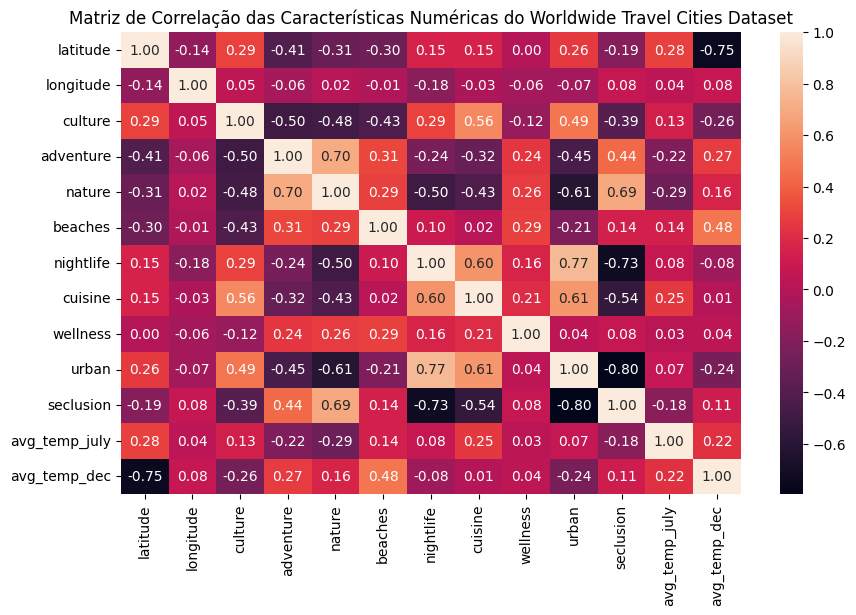

In [32]:
plt.figure(figsize=(10, 6))
# mapa de calor da matriz de correlação
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Worldwide Travel Cities Dataset')
plt.show()

- Latitude e Temperatura Média em Dezembro (-0,75):
   - Forte correlação negativa: como esperado, quanto maior a latitude (mais ao norte), menor a temperatura média em dezembro. Isso reflete o impacto da localização geográfica no clima.

- Nightlife e Urban (0,77):
   - Forte correlação positiva: cidades com vida noturna ativa tendem a ser mais urbanas. Assim, faz sentido que exista correlação entre os indicadores de  disponibilidade de festas, bares e vida noturna em geral e qualidade do ambiente urbano, incluindo arquitetura, acessibilidade a pé.

- Cuisine e Culture (0,56):
   - Correlação positiva moderada: cidades com amplo cenário gastronômico também tendem a ter um apelo cultural forte, sugerindo que cultura e culinária podem estar interligadas.

- Nature e Adventure (0,70):
   - Forte correlação positiva: cidades com disponibilidade de paisagens naturais também tendem a oferecer mais atividades de aventura, como trilhas, esportes ao ar livre, etc.

- Seclusion e Nature (0,69):
   - Forte correlação positiva: cidades mais isoladas tendem a ter maior proximidade com a natureza, indicando destinos tranquilos e naturais.

- Beaches e avg_temp_dec (0,48):
   - Correlação positiva moderada: cidades com disponibilidade de praias tendem a ter temperaturas mais altas em dezembro, sugerindo que muitas delas estão em regiões tropicais ou do hemisfério sul.

- Seclusion e Nightlife (-0,73):
   - Forte correlação negativa: cidades mais isoladas tendem a ter menos vida noturna, o que é esperado em destinos tranquilos e afastados.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## Seleção de features

Para treinamento do futuro modelo de classificação, nem todas as colunas disponíveis no dataset são necessárias. Colunas como o "id" não agregam novas informações e podem confundir o algoritmo ao invés de ajudá-lo. Para isso, a seleção de features é importante.

In [33]:
df_feat = df[['country', 'region', 'latitude', 'longitude', 'ideal_durations', 'budget_level',
       'culture', 'adventure', 'nature', 'beaches', 'nightlife', 'cuisine',
       'wellness', 'urban', 'seclusion', 'avg_temp_july', 'avg_temp_dec']]

Foram removidas as colunas "id", "city",  "short_description" e  "avg_temp_monthly". As colunas "id" e "city" foram excluídas porque possuem valores únicos por linha, não contribuindo com informações relevantes para a tarefa de classificação. A coluna "short_description" foi descartada por conter texto completo, que não seria interpretado adequadamente por um modelo de classificação tradicional, sendo mais apropriada para aplicações de NLP. E a coluna "avg_temp_monthly" porque já foi tratada e simplificada nas colunas 'avg_temp_july' e 'avg_temp_dec' para ser utilizada no modelo.

## One-Hot Encoding para os dados categóricos

In [34]:
df_encoded = pd.get_dummies(df_feat, columns=['country', 'region'], drop_first=True)

In [35]:
# Explodir os valores da lista em colunas binárias
df_encoded['ideal_durations'] = df_encoded['ideal_durations'].apply(lambda x: eval(x))  # Converter string para lista
durations_encoded = df_encoded['ideal_durations'].str.join('|').str.get_dummies()

# Concatenar com o DataFrame original
df_encoded = pd.concat([df_encoded, durations_encoded], axis=1)
df_encoded = df_encoded.drop('ideal_durations', axis=1)

In [36]:
df_encoded.head()

,latitude,longitude,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,...,region_europe,region_middle_east,region_north_america,region_oceania,region_south_america,Day trip,Long trip,One week,Short trip,Weekend
0,45.464194,9.189635,Luxury,5,2,2,1,4,5,3,...,True,False,False,False,False,0,0,1,1,0
1,-17.290947,177.125786,Luxury,2,4,5,5,2,3,4,...,False,False,False,True,False,0,1,1,0,0
2,50.117190,-122.954302,Luxury,3,5,5,2,3,3,4,...,False,False,True,False,False,0,0,1,1,1
3,20.987700,-101.000000,Mid-range,5,3,3,1,3,4,3,...,False,False,True,False,False,0,0,1,1,1
4,-7.245972,112.737827,Budget,4,3,3,2,3,4,3,...,False,False,False,False,False,0,0,0,1,1


## Separação entre dados de treino e teste

In [37]:
# Separar features (X) e target (y)
X = df_encoded.drop('budget_level', axis=1)
y = df_encoded['budget_level']

In [38]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27, stratify=y)

In [39]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (392, 190)
Dimensões de X_test: (168, 190)
Dimensões de y_train: (392,)
Dimensões de y_test: (168,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [40]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [41]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [42]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [43]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   latitude  longitude   culture  adventure    nature  beaches  nightlife  \
0  0.519728   0.835411  0.666667   0.333333  0.000000     0.25       0.75   
1  0.694599   0.658847  0.333333   0.000000  0.000000     0.00       0.25   
2  0.148614   0.339199  0.333333   0.333333  0.333333     1.00       1.00   
3  0.707439   0.683085  1.000000   0.333333  0.333333     0.00       0.25   
4  0.814613   0.491144  1.000000   0.000000  0.333333     0.00       0.50   

    cuisine  wellness  urban  ...  region_europe  region_middle_east  \
0  0.666667  0.333333   0.75  ...            0.0                 0.0   
1  0.333333  0.000000   0.50  ...            0.0                 0.0   
2  0.666667  0.333333   0.75  ...            0.0                 0.0   
3  0.666667  0.000000   0.50  ...            0.0                 0.0   
4  0.666667  0.333333   0.50  ...            1.0                 0.0   

   region_north_america  region_oceania  region_sou

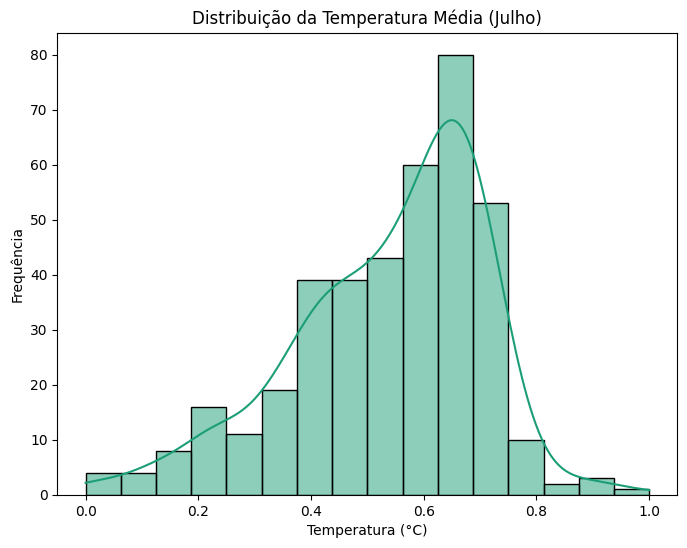

In [44]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['avg_temp_july'], kde=True, color=sns.color_palette('Dark2')[0])
plt.title('Distribuição da Temperatura Média (Julho)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.show()

É possível notar que o histograma preserva seu formato e distribuição originais, mas com os valores dentro da escala de 0 a 1.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [45]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [46]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [47]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [48]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   latitude  longitude   culture  adventure    nature   beaches  nightlife  \
0 -0.219279   1.389642  0.174741  -0.240245 -1.892967 -0.284638   1.035159   
1  0.590018   0.595258 -1.048445  -1.512891 -1.892967 -0.995325  -1.072802   
2 -1.936777  -0.842881 -1.048445  -0.240245 -0.782124  1.847425   2.089140   
3  0.649443   0.704310  1.397926  -0.240245 -0.782124 -0.995325  -1.072802   
4  1.145441  -0.159261  1.397926  -1.512891 -0.782124 -0.995325  -0.018821   

    cuisine  wellness     urban  ...  region_europe  region_middle_east  \
0  0.304590 -0.109323  0.818622  ...      -0.648298           -0.124676   
1 -1.133954 -1.823501 -0.145041  ...      -0.648298           -0.124676   
2  0.304590 -0.109323  0.818622  ...      -0.648298           -0.124676   
3  0.304590 -1.823501 -0.145041  ...      -0.648298           -0.124676   
4  0.304590 -0.109323 -0.145041  ...       1.542501           -0.124676   

   region_north_america  re

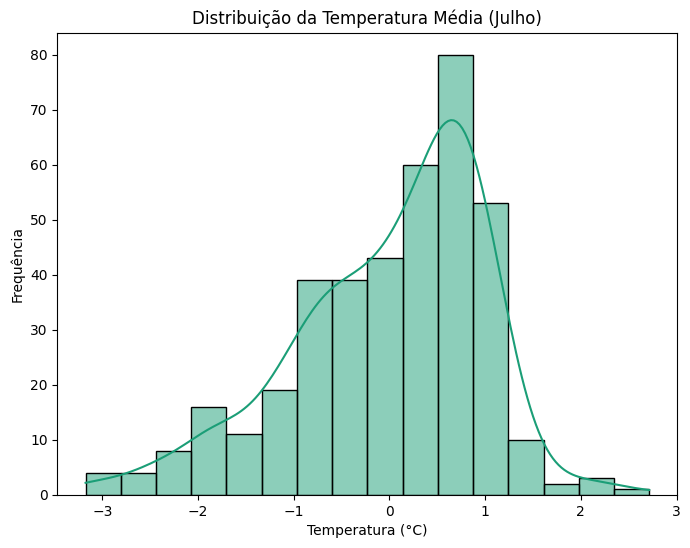

In [49]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['avg_temp_july'], kde=True, color=sns.color_palette('Dark2')[0])
plt.title('Distribuição da Temperatura Média (Julho)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.show()

O histograma, após a padronização, mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Tratamento de Valores Nulos

O dataset escolhido não possui valores nulos e por isso, não foi necessário aplicar nenhum tipo de tratamento de valores faltantes

# Conclusão

As etapas exploradas nesse projeto, de análise e pré processamento do dataset *Worldwide Travel Cities (Ratings and Climate)*, demonstraram a importância de conhecer bem o conjunto de dados antes de iniciar qualquer processo de modelagem. Assim, é possível entender a distribuição dos dados, medidas de dispersão, balanceamento da classe (se houver) entre outros fatores fundamentais.

O dataset analisado é limpo e desbalanceado, apresenta três classes e dezoito atributos (além da classe). Apresenta informações numéricas e categóricas divididas em diversos tipos de dados (lista, json, string, float, inteiro, etc). A análise exploratória revelou informações importantes sobre as médias e desvios das variáveis, além de importantes correlações entre elas que depois foram estratificadas nas três classes para melhor entendimento. A etapa de pré-processamento contou com *one-hot encoding* e outras transformações que tranformaram os dados categóricos em numéricos. Também, as etapas de normalização e padronização foram fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas da seguinte forma:

1.   *Existe correlação entre cidades recomendadas com Budget Level  = Luxury e Thematic Rating alto em Wellness?*
  - Sim, com base nas análises feitas no *boxplot, a distribuição mostra que cidades com *Budget Level* = *Luxury* têm avaliações significativamente mais altas em Wellness em comparação com as categorias *Budget* e *Mid-range*.

2.   *Cidades com alto Thematic Rating em Beaches possuem temperaturas médias maiores (para os meses de julho e dezembro)?*.
  - Sim, especialmenrte para o mês de dezembro. De acordo com a matriz de correlação, existe uma correlação positiva moderada entre o indicador Beaches e a temperatura média em dezembro (0,48). Para o mês de julho, a correlação também é positiva, mas fraca (0,14).

3.   *Existe correlação entre cidades recomendadas com Budget Level = Luxury e Thematic Rating alto em Cuisine?*
  - Não, com base nas análises feitas no *boxplot*, a similaridade entre as distribuições indica que o Thematic Rating de Cuisine não varia significativamente com o Budget Level.